<h1>Data Collection and importing Libraries</h1>

In this step, we import all the essential libraries required for the complete data science workflow. This includes handling data, visualization, preprocessing, model building, evaluation, and optimization. Here's a breakdown of the purpose of each group of libraries:

<b>📦 1. Data Handling & Analysis</b><br>
pandas and numpy are used for data manipulation, handling missing values, and statistical operations.
scipy.stats helps with statistical functions and hypothesis testing.

<b>📊 2. Data Visualization</b><br>
matplotlib and seaborn are used for creating static plots and exploratory data analysis (EDA).

plotly.express is used for creating interactive plots to gain deeper insights into the dataset.

<b>⚙️ 3. Data Preprocessing</b><br>
StandardScaler, MinMaxScaler: For feature scaling.
LabelEncoder, OneHotEncoder: For encoding categorical features.
SimpleImputer: For handling missing values.

<b>🤖 4. Machine Learning Models</b><br>
Classification Algorithms: Logistic Regression, KNN, SVM, Decision Trees, Random Forest, Naive Bayes, AdaBoost, Gradient Boosting

These models are used to classify whether a customer will churn or not based on input features.

<b>🧪 5. Model Training & Evaluation</b><br>
train_test_split, cross_val_score, GridSearchCV: For splitting the dataset, validating model performance, and optimizing hyperparameters.

accuracy_score, confusion_matrix, classification_report: For evaluating classification models using various metrics.

<b>🔄 6. Pipeline</b><br>
Pipeline allows us to streamline preprocessing and model training into a clean, repeatable workflow.

<b>🛑 7. Warnings Management</b><br>
warnings.filterwarnings('ignore'): Suppresses unnecessary warnings to keep the notebook clean and readable.

In [ ]:


# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

# pipeline
from sklearn.pipeline import Pipeline

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<b>📥 Step 1: Loading the Dataset</b><br>
In this step, we load the Telco Customer Churn dataset, which contains customer information such as demographics, account details, and service usage. The dataset is used to build a predictive model to identify customers who are likely to churn (i.e., stop using the service

🔹 We use pandas.read_csv() to load the dataset into a DataFrame for analysis.

🔹 pd.set_option('display.max_columns', None) ensures that all columns are visible when we display the DataFrame, which is especially useful during exploration.

🔹 df.head() displays the first 5 rows to get an overview of the data structure and feature types.

✅ Objective: Understand the raw structure of the data before preprocessing and analysis.



In [5]:
# load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h1>Understanding The dataset</h1>

<b> Step 2: Dataset Structure Overview</b><br>
We use the df.info() method to get a concise summary of the dataset. This function provides the following useful details:

\*Total number of entries (rows)

\*Number of columns

\*Column names and their data types

\*Non-null counts per column

\*Memory usage

✅ Objective: Identify data types (e.g., object, float, int), detect missing values, and plan appropriate data preprocessing strategies such as type conversion and imputation.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<h1>Data Preprocessing</h1>





<b>🧹 Step 1: Data Cleaning and Type Conversion</b><br>
Before performing analysis or training models, it's important to clean and prepare the data.

<b>🔄 Convert Data Types</b><br>
The column TotalCharges is supposed to be numerical but is stored as an object due to presence of some non-numeric values (like blank spaces).

We use pd.to_numeric() with errors='coerce' to convert it to a float type. Any non-convertible values are set to NaN.

<b>🧼 Handle Missing Values</b><br>
After conversion, we drop rows with missing values (NaN) using dropna(). This ensures clean and consistent data for training.

<b>🆔 Remove Irrelevant Columns</b><br>
We remove the customerID column, as it is just a unique identifier and does not contribute to churn prediction.

✅ Objective: Ensure the dataset contains clean, numerical, and relevant features for modeling.




In [4]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# drop missing values
df.dropna(inplace=True)

# drop customerID 
df.drop('customerID', axis=1, inplace=True)

<b>🔎 Step 2: Exploring Categorical Features</b><br>
To prepare our dataset for machine learning models, we need to identify categorical features that require encoding.

<b>In this step, we loop through all the columns in the DataFrame and:<b><br>

\*Check the data type of each column.

\*Print unique values of columns that are not numeric (int64 or float64).

<b>This helps in:<b><br>

\*Understanding the distinct categories present in each non-numeric feature

\*Identifying potential binary/multiclass features

\*Planning Label Encoding or One-Hot Encoding

✅ Objective: Detect which features are categorical and analyze their distinct values to decide how they should be preprocessed.

In [10]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [11]:
# check missing value
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<b>🌡️ Step 3: Visualizing Missing Values</b></br>
We use a heatmap from the Seaborn library to visualize missing values in the dataset.

\*df.isnull() returns a DataFrame of the same shape as df with True where values are missing.<br>
\*The heatmap highlights missing data visually, making it easier to spot patterns or concentrations of null values across columns.

✅ Objective: Quickly identify and confirm if any missing data still exists after cleaning operations.



<Axes: >

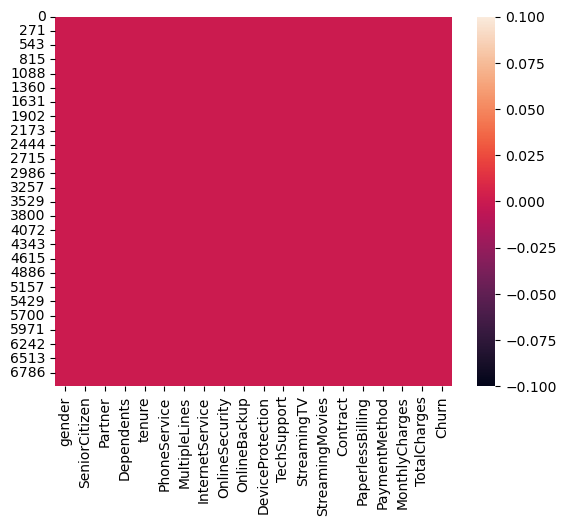

In [12]:
# heatmap for missing value
sns.heatmap(df.isnull())

📊 <b>Step 4: Visualizing Categorical Features Against Churn</b><br>
To understand how different categorical features impact customer churn, we generate count plots for each predictor.

🔹 <b>What this code does:</b><br>
Defines a color palette:
'Yes' (churned customers) in red
'No' (retained customers) in blue

🔹Loops through all categorical predictors (excluding numerical features like TotalCharges, MonthlyCharges, and tenure)<br>
🔹Creates a Seaborn countplot for each feature, with the Churn column as the hue<br>
🔹Displays a separate plot for each predictor to show how the churn distribution varies<br>

✅ Objective: Visually analyze how different categorical variables (like contract type, internet service, payment method, etc.) influence customer churn.

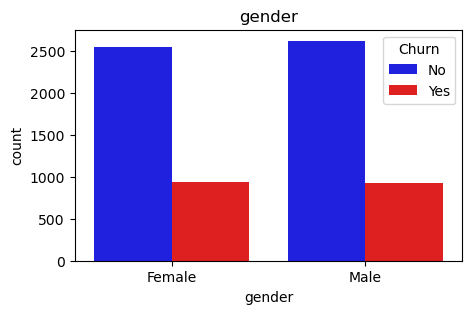

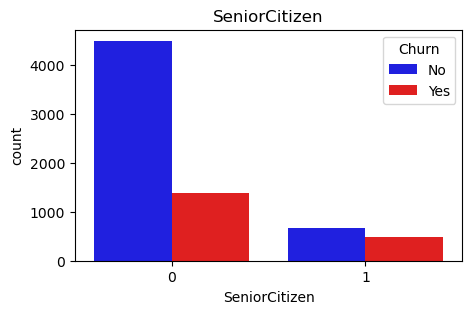

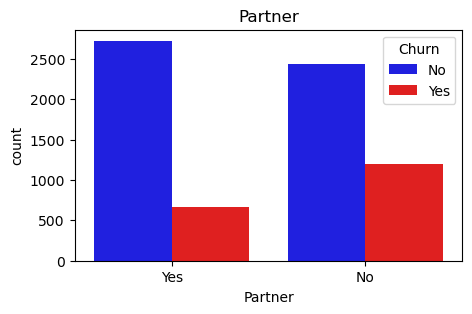

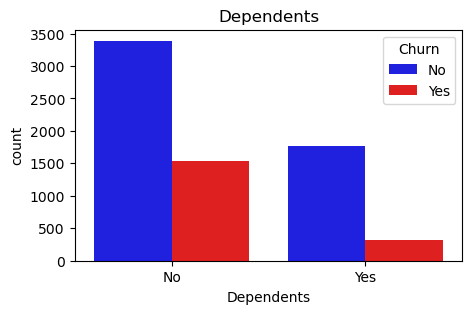

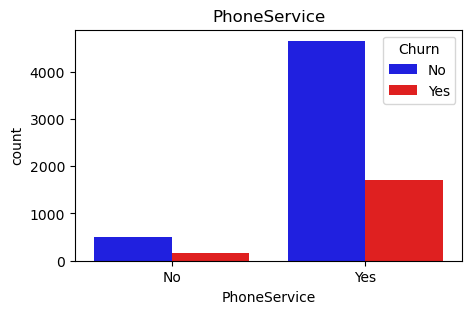

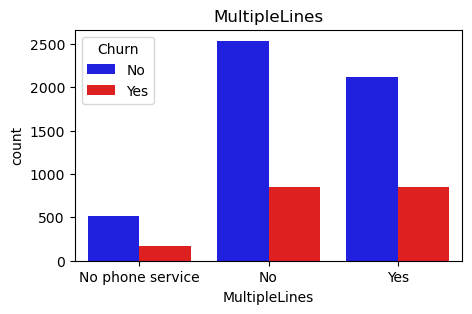

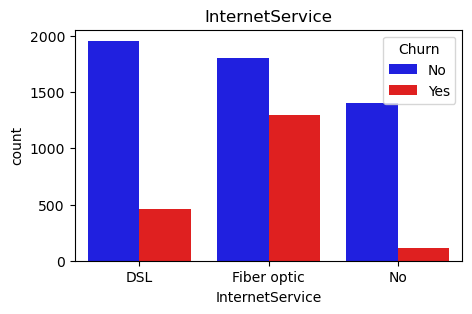

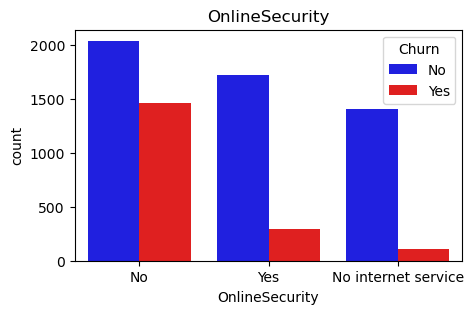

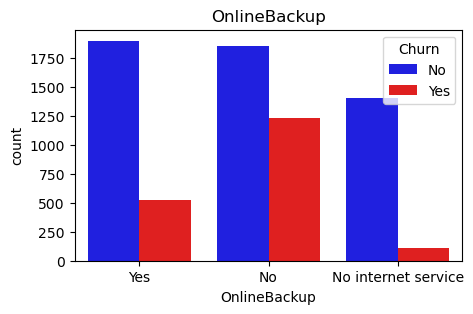

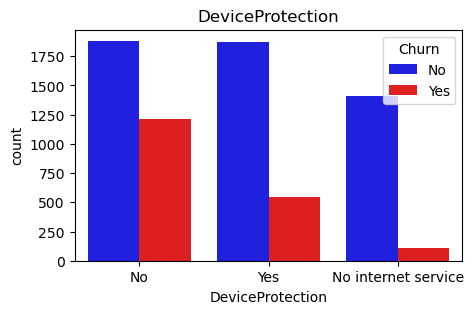

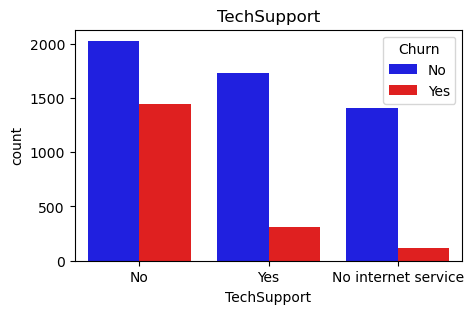

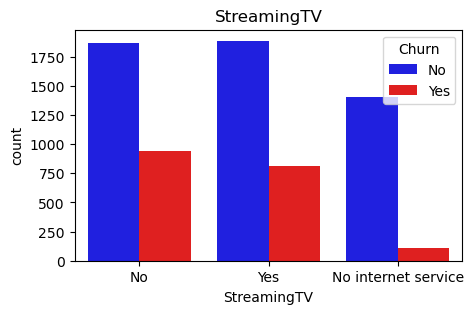

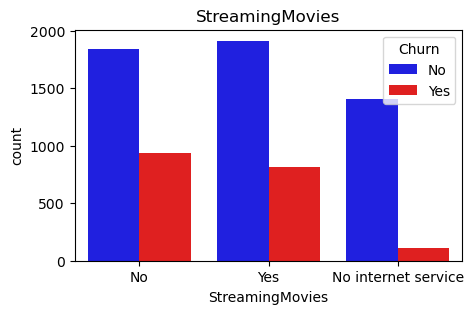

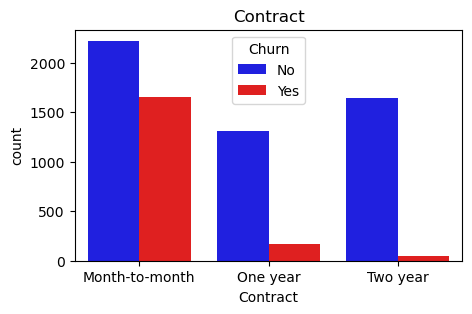

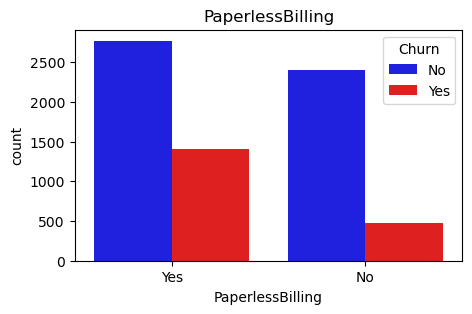

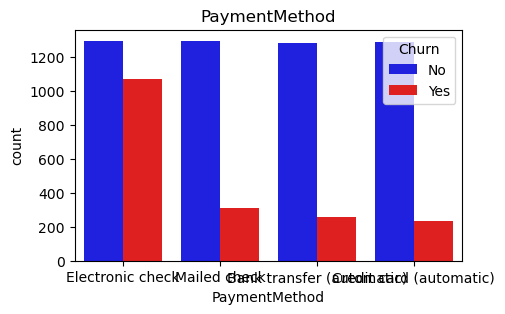

In [13]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

<b>📈 Step 5: Distribution of Tenure Based on Churn</b></br>
In this step, we analyze the tenure (i.e., how long a customer has been with the company) to understand its relationship with churn behavior.

✅What the code does:<br>
🔹Splits the dataset into churned and non-churned customers.<br>
🔹Uses plt.hist() to plot overlapping histograms of tenure for both groups.<br>
🔹Applies color coding:<br>
\*Red for customers who churned<br>
\*Blue for customers who stayed<br>
🔹Adds gridlines for readability and displays the count on top of each bar for better interpretation.<br>

💡 Insights:<br>
🔹Customers with shorter tenure are more likely to churn.<br>
🔹As tenure increases, the likelihood of churn generally decreases, indicating stronger customer loyalty over time.<br>

✅ Objective: Identify how customer retention is affected by the length of their relationship with the service.

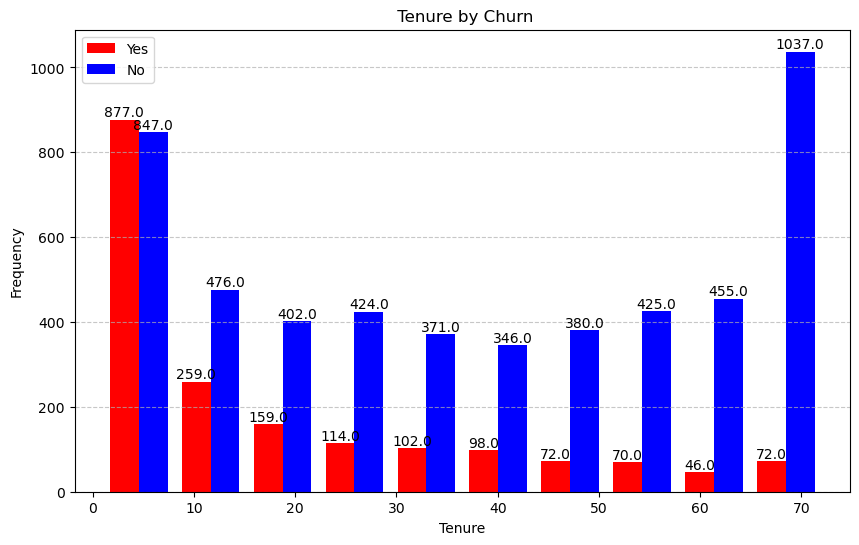

In [14]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

<b>📈 Step 7: Distribution of Tenure Based on Churn</b></br>
In this step, we analyze the tenure (i.e., how long a customer has been with the company) to understand its relationship with churn behavior.

✅What the code does:<br>
🔹Splits the dataset into churned and non-churned customers.<br>
🔹Uses plt.hist() to plot overlapping histograms of tenure for both groups.<br>
🔹Applies color coding:<br>
\*Red for customers who churned<br>
\*Blue for customers who stayed<br>
🔹Adds gridlines for readability and displays the count on top of each bar for better interpretation.<br>


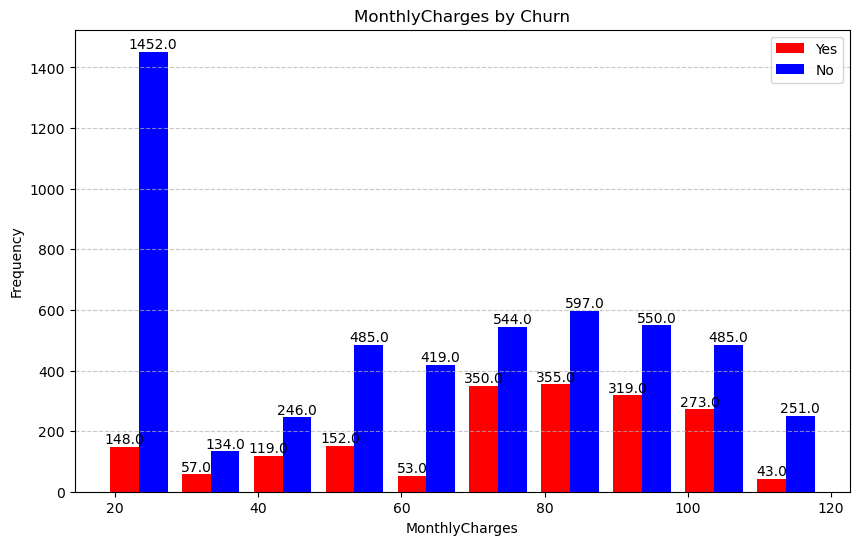

In [15]:
# make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

<h1>Feature Engineering</h1>

<b>🔄 Step 1: Encoding Categorical Variables using One-Hot Encoding</b><br>
Most machine learning algorithms require numerical input, so we need to convert categorical variables into a numerical format.

<b> Steps performed:</b><br>
Identify Categorical Columns:<br>
🔹We use select_dtypes() to extract all features of type object or category.<br>
🔹Apply One-Hot Encoding:<br>
\*We use OneHotEncoder from sklearn to transform these categorical variables into binary (0/1) columns.<br>
\*sparse_output=False ensures the output is a dense NumPy array.<br>

🔹Create Encoded DataFrame:<br>
\*Column names are retrieved using get_feature_names_out() for clarity.<br>

🔹Replace Original Columns:<br>
\*We drop the original categorical columns from the dataset.<br>
\*Then, we concatenate the new encoded columns back into the DataFrame.<br>

🔹Index Reset:<br>
\*We reset the index to ensure consistency before merging.

✅ Objective: Ensure all features are numeric and suitable for machine learning models, while preserving the meaning of the original categories.

In [ ]:


# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Setting drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)


In [17]:
df.drop('Churn_No', axis=1, inplace=True)

In [18]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [19]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

<b>✂️ Step 9: Splitting the Dataset into Features and Target</b><br>
In this step, we prepare the data for model training by separating features and target variables and then splitting them into training and testing sets.<br>

<b> Step-by-step breakdown:</b><br>
🔹Separate Features and Target:<br>
X: All columns except 'Churn' (independent variables).<br>
y: The 'Churn' column (dependent variable we want to predict).<br>

🔹Train-Test Split:<br>
We use train_test_split() from sklearn.model_selection.<br>

🔹The dataset is split into:<br>
80% for training the model<br>
20% for testing the model's performance<br>

✅ Objective: Train the model on one portion of the data and test its performance on unseen data to evaluate its real-world applicability.

In [32]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h1>Traininng the model</h1>

<b>🤖 Step 10: Model Building, Evaluation & Hyperparameter Tuning</b><br>
In this step, we train and evaluate multiple machine learning models to identify the best-performing algorithm for customer churn prediction.<br>

<b>🔍 Models Used:</b><br>
We evaluate a range of supervised learning models, including:<br>
\*Random Forest<br>
\*Gradient Boosting<br>
\*Support Vector Machine (SVM)<br>
\*Logistic Regression<br>
\*K-Nearest Neighbors (KNN)<br>
\*Decision Tree<br>
\*AdaBoost<br>
\*Naive Bayes<br>

<b>🧰 Pipeline Setup:</b><br>
Each model is wrapped in a Pipeline that includes:<br>
\*MinMaxScaler for feature scaling<br>
\*The model itself<br>
\*GridSearchCV is used for hyperparameter tuning (for applicable models), improving accuracy through cross-validated search.<br>

<b>📈 Evaluation:</b><br>
\*Models are trained on X_train and evaluated on X_test.<br>
\*Accuracy Score is computed for each model.<br>
\*The model with the highest test accuracy is stored as the best model.<br>

<b>🏆 Outcome:</b><br>
\*Accuracy of all models is printed for comparison.<br>
\*The best-performing model pipeline and its accuracy are displayed at the end.<br>

✅ Objective: Compare and optimize various classifiers using hyperparameter tuning to select the most effective model for predicting customer churn.

In [31]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
     # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy,"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy, "%")

Model: Random Forest
Test Accuracy: 0.798862828713575 %

Model: Gradient Boosting
Test Accuracy: 0.8073916133617626 %

Model: Support Vector Machine
Test Accuracy: 0.7590618336886994 %

Model: Logistic Regression
Test Accuracy: 0.7640369580668088 %

Model: K-Nearest Neighbors
Test Accuracy: 0.7661691542288557 %

Model: Decision Tree
Test Accuracy: 0.7704335465529495 %

Model: Ada Boost
Test Accuracy: 0.806680881307747 %

Model: Naive Bayes
Test Accuracy: 0.7085998578535891 %

Best Model:
Test Accuracy: 0.8073916133617626
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(n_estimators=50, random_state=42))]) with accuracy 0.8073916133617626 %


<h1> Vistualiations</h1>

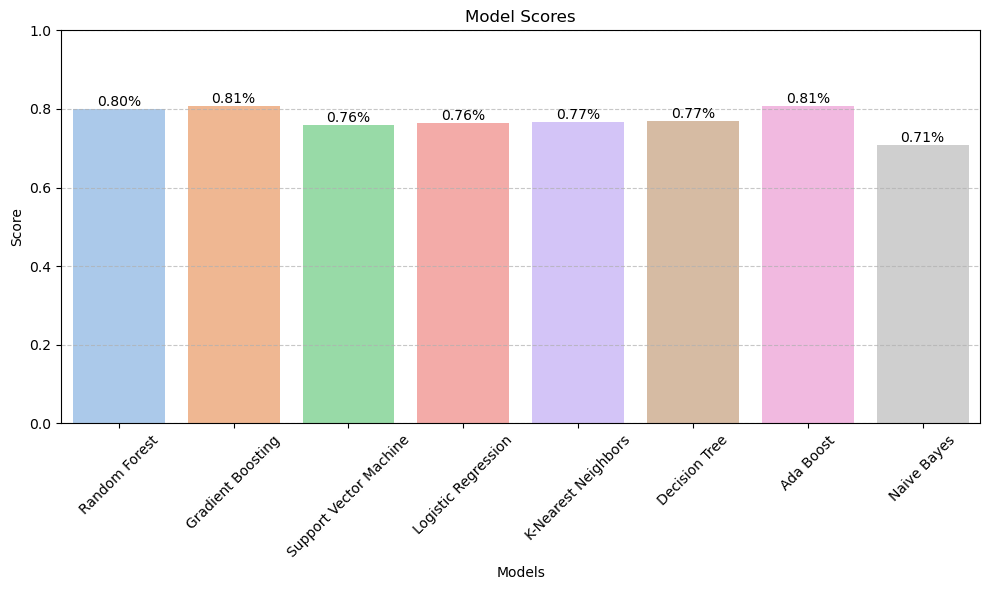

In [23]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


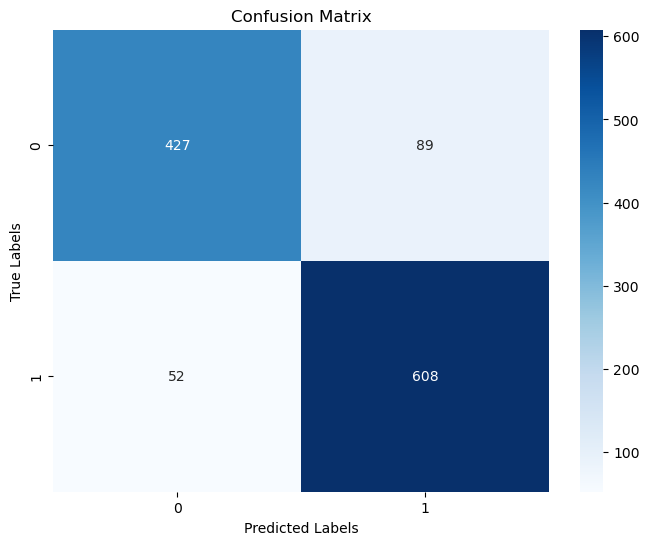

In [25]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()